In [1]:
#Programmer : Aditya Rokade
#College : Keystone School of Engineering
#Year  : TE

In [57]:
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report

In [5]:
df = pd.read_csv('DATASETS/iris.csv')

### Basic Stats

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Species', ylabel='Count'>

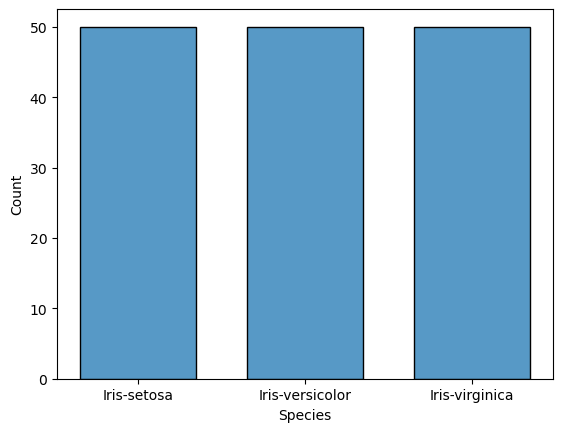

In [42]:
sns.histplot(df['Species'], shrink= 0.7)

In [11]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Data Preprocessing

In [27]:
x = df.drop(['Id', 'Species'],axis=1)

In [28]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x.values)

### Data Preparation

In [29]:
y = df['Species']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### Model Training

In [44]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [45]:
y_pred = model.predict(x_test)

### Model Evaluation

In [47]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  2, 11]], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

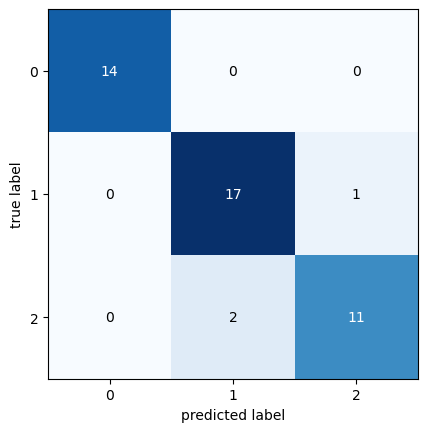

In [50]:
plot_confusion_matrix(conf_mat=cm)

In [51]:
print('Accuracy score : ', accuracy_score(y_test,y_pred))

Accuracy score :  0.9333333333333333


In [52]:
print('Error Rate : ', (1 - accuracy_score(y_test,y_pred)))

Error Rate :  0.06666666666666665


In [56]:
print('F1 score : ', f1_score(y_test,y_pred, average='macro'))

F1 score :  0.9329729729729729


In [55]:
print(f"Precision score is {precision_score(y_test, y_pred, average='macro')}")

Precision score is 0.9371345029239766


In [58]:
print(f"Recall score is {recall_score(y_test, y_pred, average='macro')}")

Recall score is 0.9301994301994302


In [59]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.94      0.92        18
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

